In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/data_raw_corrected.csv')

In [4]:
data.columns

Index(['subject_id', 'icustay_id', 'ethnicity', 'gender', 'LOS', 'icd9_code',
       'age', 'icu_stay_rank', 'hadm_id', 'mortality', 'weight_first',
       'height_first', 'heart_rate_first', 'heart_rate_mean',
       'heart_rate_last', 'sbp_mean', 'dbp_mean', 'temp_mean', 'rr_mean',
       'spo2_mean', 'glucose_mean', 'sodium_mean', 'sodium_min', 'sodium_max',
       'chloride_mean', 'chloride_min', 'chloride_max', 'potassium_mean',
       'potassium_min', 'potassium_max', 'total_dobutamine_duration_hours',
       'total_epinephrine_duration_hours', 'total_dopamine_duration_hours',
       'total_norepinephrine_duration_hours', 'first_day_notes'],
      dtype='object')

In [5]:
data = data.dropna(subset=['first_day_notes'])

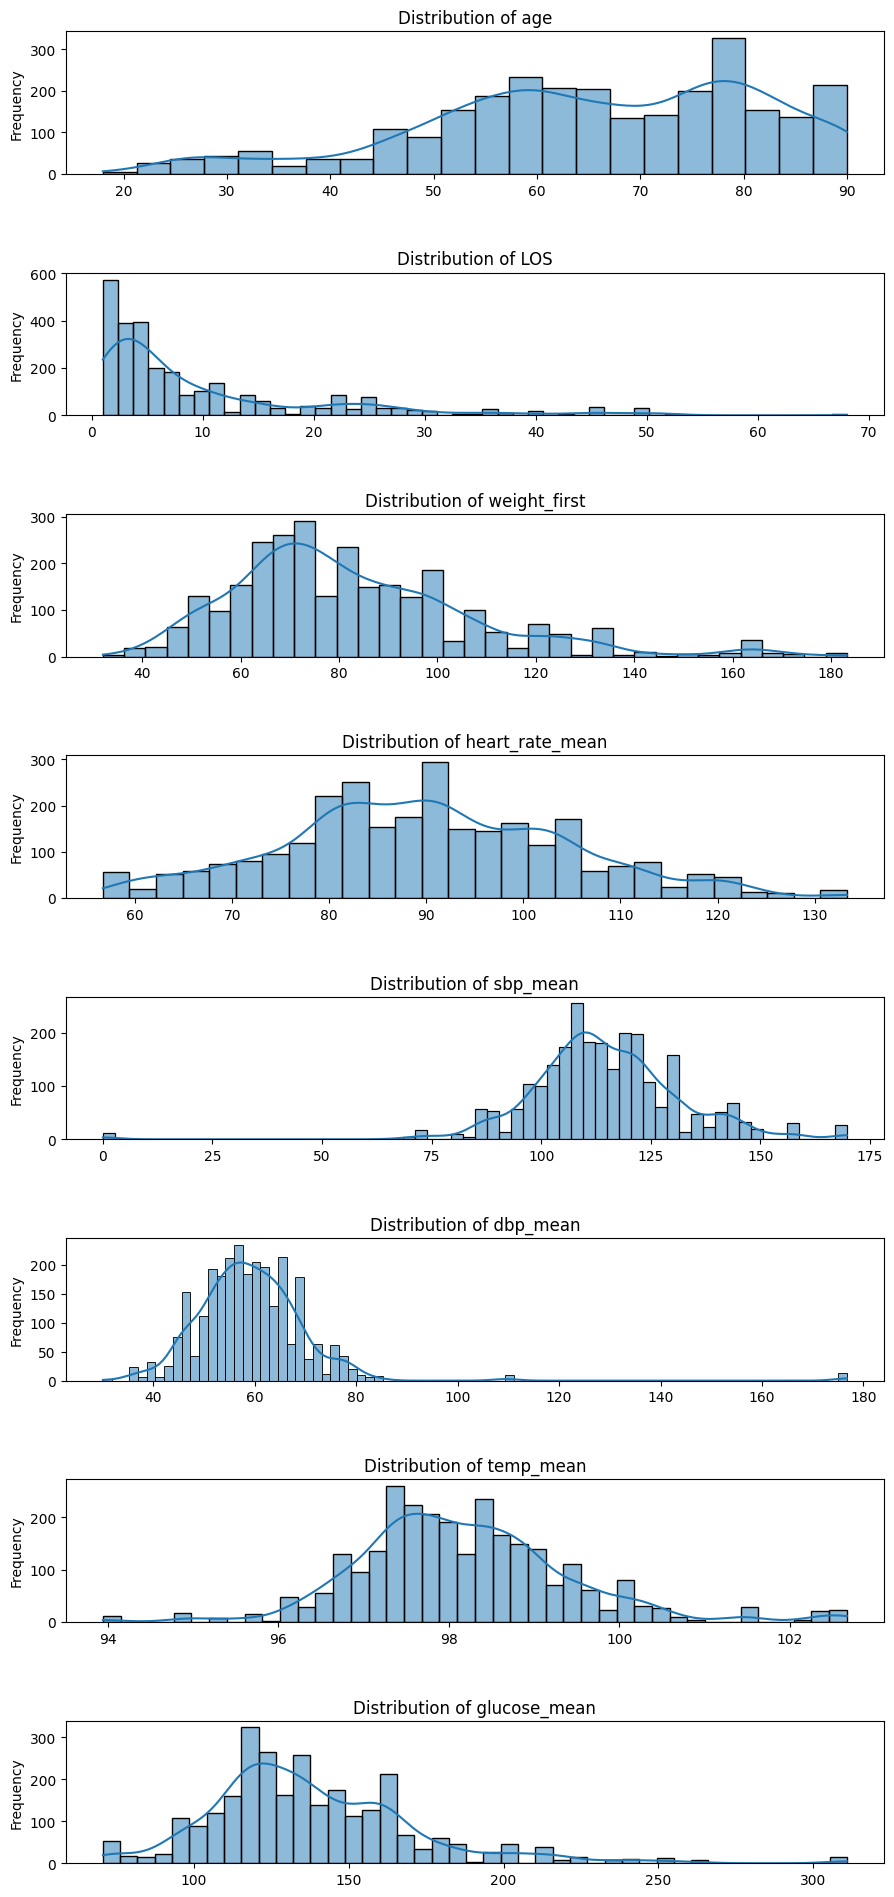

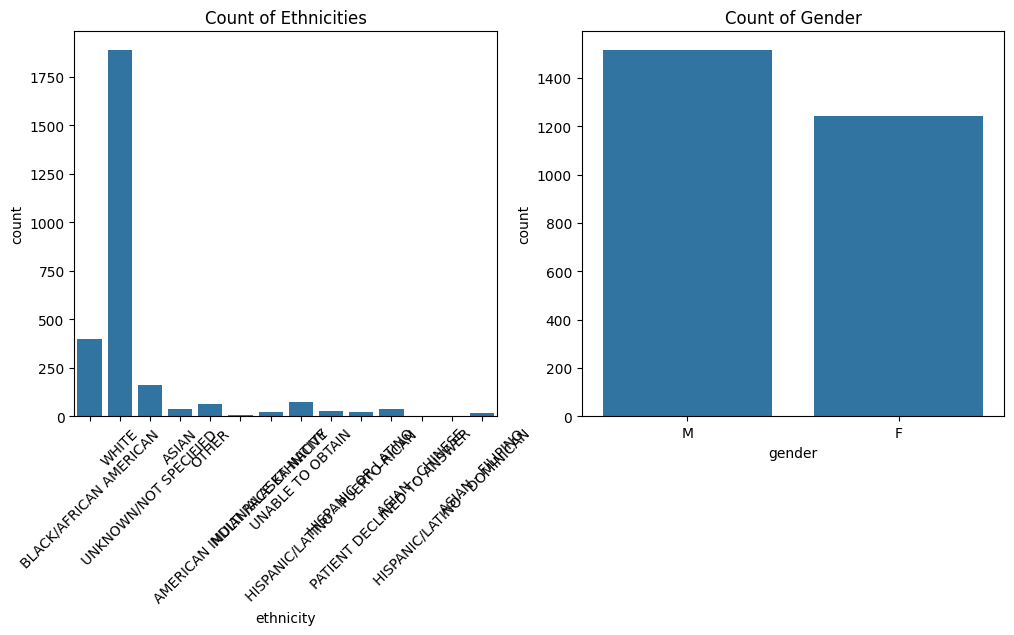

array(['Atrial fibrillation (Afib)\n   Assessment:\n   Action:\n   Response:\n   Plan:\n   Mr. [**Known lastname **] is a 28yo M with h/o AML s/p recurrence after 3 allogenic\n   transplants from unrelated donor, re-presents with diarrhea.   Since\n   his admission on [**2136-9-25**] he has had continued watery diarrhea and\n   vomiting, on previous MICU admit he was c.diff +He continues to have\n   large volume watery green diarrhea.\n   Events: Pt transferred from 7 [**Hospital Ward Name 669**] for relative hypotension of sbp\n   80-90 from baseline 120-130\ns not responsive to fluid recussitation and\n   accompanied by new onset Atrial fibrilation.\n',
       '48 yo F ESRD on HD (m/w/f), HBV on antivirals, recent long admission\n   after PEG placement c/b abdominal wall abscess with resultant\n   necrotizing fasciitis, bacteremia, wound infections.  She was\n   transferred to a rehab facility and had completed a course of abx for\n   wound infection (wound vac sitll in place).  Seve

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of columns for EDA
eda_columns = ['ethnicity', 'gender', 'age', 'LOS', 'weight_first', 'heart_rate_mean', 'sbp_mean', 'dbp_mean', 'temp_mean', 'glucose_mean']

# Display distributions for numerical columns
fig, axes = plt.subplots(nrows=len(eda_columns)-2, ncols=1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate([c for c in eda_columns if data[c].dtype != 'object']):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Show the counts of categorical data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='ethnicity', data=data, ax=axes[0])
axes[0].set_title('Count of Ethnicities')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='gender', data=data, ax=axes[1])
axes[1].set_title('Count of Gender')

plt.show()

# Display a sample of the clinical notes to understand their structure and content
sample_notes = data['first_day_notes'].dropna().sample(5).values
sample_notes

In [7]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def preprocess_notes_safe(text):
    if pd.isna(text):
        return []  # Return an empty list for NaN values
    custom_filters = [strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short]
    return preprocess_string(text, custom_filters)

# Apply preprocessing safely
data['processed_notes'] = data['first_day_notes'].apply(lambda x: preprocess_notes_safe(x))

# Now, ensure that you only create TaggedDocument objects for non-empty lists
tagged_data = [
    TaggedDocument(words=word_tokenize(" ".join(doc).lower()), tags=[str(i)])
    for i, doc in enumerate(data['processed_notes']) if doc  # Ensure doc is not empty
]

# Continue with the training of the Doc2Vec model as before
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Display the size of the vocabulary and a sample embedding
vocabulary_size = len(model.wv.key_to_index)
sample_embedding = model.dv[0]  # Get embedding for the first document

vocabulary_size, sample_embedding

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(14689,
 array([-0.50147295, -1.1835287 ,  1.9892242 , -0.14371352, -1.3618064 ,
        -0.2531464 , -0.63806057, -0.26907095, -1.3508677 , -1.4336034 ,
         0.39923862, -1.3463118 , -1.2651955 , -0.76270497,  0.5529048 ,
        -1.2483969 ,  0.49162373, -0.4526006 ,  0.24396259, -0.32318774,
         0.06918789,  0.02437763,  1.697358  , -0.59303534, -0.00701274,
        -0.3930686 ,  0.20553449, -1.3865563 , -0.5624008 , -0.6870702 ,
         1.2960831 , -0.81030154,  0.6020928 ,  1.3109015 ,  0.10673784,
         1.7387185 ,  0.82400817, -0.61306095,  0.89247173, -0.65477955,
         0.86181533, -0.0632745 , -0.43295327, -0.19928855, -0.10545501,
         0.5725633 , -0.30123478, -0.74338967, -0.67514306,  0.24135605,
         1.2429265 , -0.21919695,  1.0310735 , -1.0178708 , -0.5842934 ,
         0.7259576 , -0.21897203,  0.2679135 , -0.46286058,  0.7177865 ,
         0.34371343,  0.71366656,  0.09095888,  1.3886671 , -0.8297586 ,
         0.63926214, -0.51865613, -0.469785

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define columns for preprocessing
numeric_features =  [
    'age', 'LOS', 'weight_first', 'height_first', 'heart_rate_first',
    'heart_rate_mean', 'heart_rate_last', 'sbp_mean', 'dbp_mean', 'temp_mean',
    'rr_mean', 'spo2_mean', 'glucose_mean', 'sodium_mean', 'sodium_min', 'sodium_max',
    'chloride_mean', 'chloride_min', 'chloride_max', 'potassium_mean', 'potassium_min',
    'potassium_max'
]

# The categorical features remain the same as before
categorical_features = ['ethnicity', 'gender']

# Update the preprocessing pipelines to handle the expanded set of features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Update the ColumnTransformer to use the expanded set of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit and transform the structured data using the expanded set of features
X_structured_preprocessed = preprocessor.fit_transform(data)

# Display the shape of the preprocessed structured data with expanded features
X_structured_preprocessed.shape

(2759, 38)

In [ ]:
X_structured_preprocessed

array([[-0.69464664, -0.34529976,  1.23067037, ...,  0.        ,
         0.        ,  1.        ],
       [-0.69464664, -0.34529976,  1.23067037, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.59553229, -0.63543402, -0.13325372, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.51708867,  0.15775131, -1.17719561, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.51708867,  0.15775131, -1.17719561, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.51708867,  0.15775131, -1.17719561, ...,  0.        ,
         0.        ,  1.        ]])

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

num_docs = len(data)
placeholder_embeddings = np.random.rand(num_docs, 100)
X_combined = np.hstack((X_structured_preprocessed, placeholder_embeddings))

# Split the combined dataset into training and testing sets
X_train, X_test = train_test_split(X_combined, test_size=0.2, random_state=42)

# Display the shapes of the combined dataset and the training/testing splits
X_combined_shape = X_combined.shape
X_train_shape = X_train.shape
X_test_shape = X_test.shape

X_combined_shape, X_train_shape, X_test_shape

((2759, 138), (2207, 138), (552, 138))

In [13]:
y = data['mortality'].values

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, concatenate, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


structured_input_shape = X_structured_preprocessed.shape[1]
unstructured_input_shape = 100

# Structured data input
structured_input = Input(shape=(structured_input_shape,), name='structured_input')

# Unstructured data input
unstructured_input = Input(shape=(unstructured_input_shape,), name='unstructured_input')

# Combine
combined = concatenate([structured_input, unstructured_input])

x = Dense(128, activation='relu')(combined)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[structured_input, unstructured_input], outputs=output)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

X_train_structured = X_train[:, :structured_input_shape]
X_train_unstructured = X_train[:, structured_input_shape:]
X_test_structured = X_test[:, :structured_input_shape]
X_test_unstructured = X_test[:, structured_input_shape:]

model.fit([X_train_structured, X_train_unstructured], y_train, validation_split=0.2, epochs=10, batch_size=32)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 structured_input (InputLay  [(None, 38)]                 0         []                            
 er)                                                                                              
                                                                                                  
 unstructured_input (InputL  [(None, 100)]                0         []                            
 ayer)                                                                                            
                                                                                                  
 concatenate_3 (Concatenate  (None, 138)                  0         ['structured_input[0][0]',    
 )                                                                   'unstructured_input[0][

In [20]:
# Preprocessing for LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


vocab_size = 19602
max_length = 450
trunc_type = 'post'
padding_type = 'post'

# Tokenization and padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(data['first_day_notes'].astype(str))
sequences = tokenizer.texts_to_sequences(data['first_day_notes'].astype(str))
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [23]:
X_train_structured, X_test_structured, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_structured_preprocessed, padded_sequences, y, test_size=0.2, random_state=42
)

structured_input = Input(shape=(X_structured_preprocessed.shape[1],), name='structured_data_input')
text_input = Input(shape=(max_length,), name='text_data_input')

# Structured data path
x_structured = Dense(64, activation='relu')(structured_input)
x_structured = Flatten()(x_structured)

# Text data path
x_text = Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length)(text_input)
x_text = LSTM(64)(x_text)

# Combine
combined = concatenate([x_structured, x_text])

x = Dense(128, activation='relu')(combined)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[structured_input, text_input], outputs=output)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit([X_train_structured, X_train_text], y_train,
          validation_data=([X_test_structured, X_test_text], y_test),
          epochs=10, batch_size=32, callbacks=[early_stopping])


Epoch 1/10
69/69 [==============================] - 34s 448ms/step - loss: 0.5942 - accuracy: 0.6910 - val_loss: 0.4431 - val_accuracy: 0.7880
Epoch 2/10
69/69 [==============================] - 32s 459ms/step - loss: 0.3966 - accuracy: 0.8251 - val_loss: 0.2969 - val_accuracy: 0.8841
Epoch 3/10
69/69 [==============================] - 31s 449ms/step - loss: 0.2544 - accuracy: 0.8994 - val_loss: 0.2181 - val_accuracy: 0.8949
Epoch 4/10
69/69 [==============================] - 29s 424ms/step - loss: 0.1788 - accuracy: 0.9275 - val_loss: 0.1615 - val_accuracy: 0.9312
Epoch 5/10
69/69 [==============================] - 29s 415ms/step - loss: 0.1441 - accuracy: 0.9443 - val_loss: 0.1360 - val_accuracy: 0.9475
Epoch 6/10
69/69 [==============================] - 29s 416ms/step - loss: 0.1156 - accuracy: 0.9570 - val_loss: 0.1135 - val_accuracy: 0.9511
Epoch 7/10
69/69 [==============================] - 38s 548ms/step - loss: 0.0832 - accuracy: 0.9696 - val_loss: 0.1089 - val_accuracy: 0.9583